In [16]:
try:
    from PIL import Image
except ImportError:
    import Image
import matplotlib.pyplot as plt

import subprocess
import imutils
import shutil
import cv2
import os

In [17]:
from paddleocr import PaddleOCR, draw_ocr
ocr = PaddleOCR(lang='en')

Namespace(cls_batch_num=30, cls_image_shape='3, 48, 192', cls_model_dir='/home/ihor/.paddleocr/2.0/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_thresh=0.3, det_db_unclip_ratio=2.0, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/ihor/.paddleocr/2.0/det', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='en', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=30, rec_char_dict_path='./ppocr/utils/dict/en_dict.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='/home/ihor/.paddleocr/2.0/rec/en', use_angle_cls=False, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)


In [18]:
labels = {
    0: 'label',
    1: 'price',
    2: 'cop',
    3: 'name',
    4: 'barcode'
}

labels_to_show = {
    0: 'label',
    1: 'price',
    2: 'cop',
    3: 'name',
#     4: 'barcode'
}

In [19]:
images_gen = iter(os.listdir('images/'))

In [20]:
image_name = next(images_gen)

In [21]:
try:
    shutil.rmtree('runs/detect/')
except OSError as e:
    print ("Error: %s - %s." % (e.filename, e.strerror))

process = subprocess.run(['python3', 'detect.py', 
                          '--weights', 'weights/best.pt', 
                          '--img', '1024',
                          '--conf', '0.45',
                          '--source', 'images/' + image_name,
                          '--save-txt'],
                                        check=False,
                                        capture_output=True,  
                                        universal_newlines=True)

### Paddle OCR

______
price
[('AA', 0.63856983)]
______
______
name
[('PAST TANOMR MUSCULOAP', 0.7969303)]
______
______
name
[('PIST TANA AR NUSCULOAPZ', 0.66902494)]
______
______
label
[('Tud', 0.59202915)]
______
______
cop
[('1s', 0.5342419)]
______
______
cop
[('15', 0.59476256)]
______
______
price
[('AA', 0.6498297)]
______
______
label
[('caud', 0.31811318)]
______


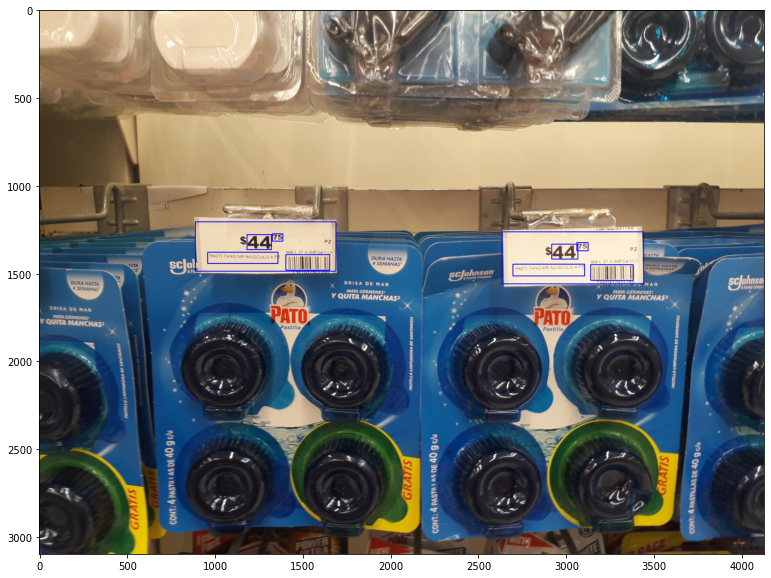

CPU times: user 1.32 s, sys: 58.7 ms, total: 1.38 s
Wall time: 1.37 s


In [23]:
%%time
img = cv2.imread('images/' + image_name)
dh, dw, _ = img.shape

fl = open("runs/detect/exp/labels/" + os.path.splitext(image_name)[0] + '.txt', 'r')
data = fl.readlines()
fl.close()

for dt in data:

    l, x, y, w, h = map(float, dt.split(' '))

    x1 = int((x - w / 2) * dw)
    x2 = int((x + w / 2) * dw)
    y1 = int((y - h / 2) * dh)
    y2 = int((y + h / 2) * dh)
    
    field = labels.get(int(l))
    if labels_to_show.get(int(l)):    
        crop_img = img[y1:y2, x1:x2]
        result = ocr.ocr(crop_img, det=False, cls=False)
        print("______")
        print(field)
        print(result)
        print("______")

    if x1 < 0:
        x1 = 0
    if x2 > dw - 1:
        x2 = dw - 1
    if y1 < 0:
        y1 = 0
    if y2 > dh - 1:
        y2 = dh - 1

    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
result = ocr.ocr(img, det=True, cls=False)
print(result)

[2021/03/16 17:10:50] root INFO: dt_boxes num : 43, elapse : 9.022372484207153
[2021/03/16 17:10:50] root INFO: rec_res num  : 43, elapse : 0.5095720291137695
[[[[394.0, 2051.0], [832.0, 2075.0], [826.0, 2184.0], [388.0, 2160.0]], ('JABON', 0.87906945)], [[[866.0, 2081.0], [1123.0, 2089.0], [1120.0, 2194.0], [863.0, 2186.0]], ('528', 0.7170627)], [[[375.0, 2158.0], [1137.0, 2179.0], [1133.0, 2317.0], [371.0, 2296.0]], ('RICITOSDE', 0.9627499)], [[[381.0, 2276.0], [1031.0, 2298.0], [1027.0, 2408.0], [377.0, 2386.0]], ('OROT0O0', 0.70188123)], [[[991.0, 2296.0], [1270.0, 2306.0], [1266.0, 2416.0], [987.0, 2406.0]], ('GRS', 0.98733574)]]
